In [1]:
import numpy as np
x=np.ones((3,4,2))
print(x)

[[[1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]]]


In [2]:
y=np.random.randint(10,40,size=(4,2,3)) #random integer between 10 and 40 with array size 4 x 3 x 2
y1=y.reshape(3,4,2)
y1

array([[[15, 19],
        [29, 35],
        [33, 24],
        [15, 26]],

       [[36, 28],
        [25, 22],
        [11, 16],
        [15, 19]],

       [[32, 33],
        [14, 20],
        [14, 24],
        [25, 12]]])

In [3]:
z=x+y1
print(z)
print('------------')
print(z.transpose())

[[[16. 20.]
  [30. 36.]
  [34. 25.]
  [16. 27.]]

 [[37. 29.]
  [26. 23.]
  [12. 17.]
  [16. 20.]]

 [[33. 34.]
  [15. 21.]
  [15. 25.]
  [26. 13.]]]
------------
[[[16. 37. 33.]
  [30. 26. 15.]
  [34. 12. 15.]
  [16. 16. 26.]]

 [[20. 29. 34.]
  [36. 23. 21.]
  [25. 17. 25.]
  [27. 20. 13.]]]


In [4]:
print(z)
print(z.ndim) #dimension of array or rank of a matrix
print(z.shape)#shape of the array
print(z.size) #number of elements
print(z.dtype)#datatype of elements
print(z.tolist())#convert to a list
print(z.sum()) #sum of all elements
print(z[2][3][0]) #gets the first element in 3rd layer, 4th row and 1st column, indexing starts from 0
print(z[2].max())#prints the maximum value in 2nd layer

[[[16. 20.]
  [30. 36.]
  [34. 25.]
  [16. 27.]]

 [[37. 29.]
  [26. 23.]
  [12. 17.]
  [16. 20.]]

 [[33. 34.]
  [15. 21.]
  [15. 25.]
  [26. 13.]]]
3
(3, 4, 2)
24
float64
[[[16.0, 20.0], [30.0, 36.0], [34.0, 25.0], [16.0, 27.0]], [[37.0, 29.0], [26.0, 23.0], [12.0, 17.0], [16.0, 20.0]], [[33.0, 34.0], [15.0, 21.0], [15.0, 25.0], [26.0, 13.0]]]
566.0
26.0
34.0


# Import IPLM1.csv 

In [5]:
path='Documents/IPLM1.csv' # File Path
dtype= '|S50' #String data type of 50 length for the numpy array
ipl1_array=np.genfromtxt(path,dtype,skip_header=1,delimiter=",")
ipl1_array[:3]

array([[b'1', b'0.1', b'Kolkata Knight Riders', b'SC Ganguly',
        b'BB McCullum', b'P Kumar', b'0', b'1', b'', b''],
       [b'1', b'0.2', b'Kolkata Knight Riders', b'BB McCullum',
        b'SC Ganguly', b'P Kumar', b'0', b'0', b'', b''],
       [b'1', b'0.3', b'Kolkata Knight Riders', b'BB McCullum',
        b'SC Ganguly', b'P Kumar', b'0', b'1', b'', b'']], dtype='|S50')

# Count number of unique batsmen having faced a ball, i.e strikers in first innings

In [6]:
unique_batsmen=set(ipl1_array[ipl1_array[:,0].astype(np.int64)==1][:,3]) # returns a subset of unique batsmen who batted in 1st innings
print(len(unique_batsmen))

5


# Find the sum of extras bowled in the 2nd innings (innings=2)

In [7]:
extras_inn2=ipl1_array[ipl1_array[:,0].astype(np.int64)==2][:,7].astype(np.int64)
print(np.sum(extras_inn2))

19


# Find the count of sixes in the first innings 

In [8]:
sixes_inn1=ipl1_array[(ipl1_array[:,0].astype(np.int64)==1) & (ipl1_array[:,6].astype(np.int64)==6)][:,6].astype(np.int64)
print(len(sixes_inn1))
print(sixes_inn1.size)

14
14


# Find the total number of deliveries faced by BB McCullum  and calculate his strike rate 


In [9]:
deliv_bbm=ipl1_array[ipl1_array[:,3].astype(np.str)=='BB McCullum'][:,1].astype(np.float64)
runs_bbm=ipl1_array[ipl1_array[:,3].astype(np.str)=='BB McCullum'][:,6].astype(np.float64)
strike_rate_bbm=np.sum(runs_bbm)/len(deliv_bbm)*100
print(strike_rate_bbm)

205.19480519480518


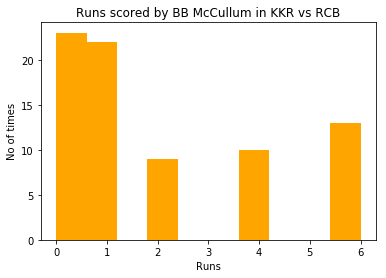

In [11]:
import matplotlib.pyplot as plt
plt.hist(ipl1_array[ipl1_array[:,3].astype(np.str)=='BB McCullum'][:,6].astype(np.float64), color='orange')
plt.xlabel('Runs')
plt.ylabel('No of times')
plt.title('Runs scored by BB McCullum in KKR vs RCB')
plt.savefig('BBM_IPL1_hist.jpg')
plt.show()


# Importing the csv file onto a DataFrame

In [16]:
import pandas as pd
ipl_df=pd.read_csv('Documents/IPLM1.csv')
ipl_df.head()

,innings,delivery,batting_team,batsman,non_striker,bowler,runs,extras,out_type,out_batsman
0,1,0.1,Kolkata Knight Riders,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN
1,1,0.2,Kolkata Knight Riders,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN
2,1,0.3,Kolkata Knight Riders,BB McCullum,SC Ganguly,P Kumar,0,1,NaN,NaN
3,1,0.4,Kolkata Knight Riders,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN
4,1,0.5,Kolkata Knight Riders,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN


In [18]:
ipl_df.info()
ipl_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
innings         225 non-null int64
delivery        225 non-null float64
batting_team    225 non-null object
batsman         225 non-null object
non_striker     225 non-null object
bowler          225 non-null object
runs            225 non-null int64
extras          225 non-null int64
out_type        13 non-null object
out_batsman     13 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 17.7+ KB


,innings,delivery,runs,extras
count,225.000000,225.000000,225.000000,225.000000
mean,1.448889,8.787111,1.191111,0.160000
std,0.498490,5.337691,1.771277,0.591004
min,1.000000,0.100000,0.000000,0.000000
25%,1.000000,4.300000,0.000000,0.000000
50%,1.000000,8.600000,1.000000,0.000000
75%,2.000000,13.100000,1.000000,0.000000
max,2.000000,19.600000,6.000000,5.000000


In [19]:
ipl_df.rename(columns={'non_striker':'runner'})

,innings,delivery,batting_team,batsman,runner,bowler,runs,extras,out_type,out_batsman
0,1,0.1,Kolkata Knight Riders,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN
1,1,0.2,Kolkata Knight Riders,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN
2,1,0.3,Kolkata Knight Riders,BB McCullum,SC Ganguly,P Kumar,0,1,NaN,NaN
3,1,0.4,Kolkata Knight Riders,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN
4,1,0.5,Kolkata Knight Riders,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN
5,1,0.6,Kolkata Knight Riders,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN
6,1,0.7,Kolkata Knight Riders,BB McCullum,SC Ganguly,P Kumar,0,1,NaN,NaN
7,1,1.1,Kolkata Knight Riders,BB McCullum,SC Ganguly,Z Khan,0,0,NaN,NaN
8,1,1.2,Kolkata Knight Riders,BB McCullum,SC Ganguly,Z Khan,4,0,NaN,NaN
9,1,1.3,Kolkata Knight Riders,BB McCullum,SC Ganguly,Z Khan,4,0,NaN,NaN


# Find the count of batsmen who have faced a delivery 

In [41]:
print(ipl_df['batsman'].nunique())
print(ipl_df.loc[:,'batsman'].unique())
print(len(ipl_df['batsman'].unique()))
print(ipl_df.loc[:,'batsman'].value_counts())

16
['SC Ganguly' 'BB McCullum' 'RT Ponting' 'DJ Hussey' 'Mohammad Hafeez'
 'R Dravid' 'W Jaffer' 'V Kohli' 'JH Kallis' 'CL White' 'MV Boucher'
 'B Akhil' 'AA Noffke' 'P Kumar' 'Z Khan' 'SB Joshi']
16
BB McCullum        77
RT Ponting         20
W Jaffer           18
P Kumar            17
AA Noffke          12
SC Ganguly         12
DJ Hussey          12
MV Boucher         11
CL White           10
SB Joshi            8
Z Khan              8
JH Kallis           7
V Kohli             5
R Dravid            3
Mohammad Hafeez     3
B Akhil             2
Name: batsman, dtype: int64


# Plot of deliveries faced by each unique batsman

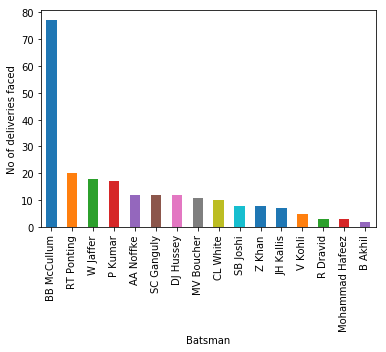

In [102]:
import matplotlib.pyplot as plt
ipl_df['batsman'].value_counts().plot(kind='bar')
plt.xlabel('Batsman')
plt.ylabel('No of deliveries faced')
plt.savefig('Bar_deliveries_faced.jpg')
plt.show()

# Find the names of batsmen who were 'run out' during the match

In [57]:
ipl_df.head(2)
ipl_df['out_batsman'][ipl_df['out_type']=='run out']

197    AA Noffke
Name: out_batsman, dtype: object

# Find the frequency of 'runs' for example how many sixes, fours, twos & ones

In [65]:
ipl_df['runs'].value_counts()

0    110
1     66
4     18
6     17
2     14
Name: runs, dtype: int64

# Get first 10 deliveries for the 2nd innings of the match

In [72]:
ipl_df[ipl_df['innings']==2].head(10)

,innings,delivery,batting_team,batsman,non_striker,bowler,runs,extras,out_type,out_batsman
124,2,0.1,Royal Challengers Bangalore,R Dravid,W Jaffer,AB Dinda,1,0,NaN,NaN
125,2,0.2,Royal Challengers Bangalore,W Jaffer,R Dravid,AB Dinda,0,1,NaN,NaN
126,2,0.3,Royal Challengers Bangalore,W Jaffer,R Dravid,AB Dinda,0,0,NaN,NaN
127,2,0.4,Royal Challengers Bangalore,W Jaffer,R Dravid,AB Dinda,1,0,NaN,NaN
128,2,0.5,Royal Challengers Bangalore,R Dravid,W Jaffer,AB Dinda,1,0,NaN,NaN
129,2,0.6,Royal Challengers Bangalore,W Jaffer,R Dravid,AB Dinda,0,0,NaN,NaN
130,2,0.7,Royal Challengers Bangalore,W Jaffer,R Dravid,AB Dinda,0,0,NaN,NaN
131,2,1.1,Royal Challengers Bangalore,R Dravid,W Jaffer,I Sharma,0,0,bowled,R Dravid
132,2,1.2,Royal Challengers Bangalore,V Kohli,W Jaffer,I Sharma,0,0,NaN,NaN
133,2,1.3,Royal Challengers Bangalore,V Kohli,W Jaffer,I Sharma,0,4,NaN,NaN


# Find out team-wise total runs

In [93]:
ipl_df.groupby('batting_team')['runs','extras'].sum()

,runs,extras
batting_team,,
Kolkata Knight Riders,205,17
Royal Challengers Bangalore,63,19


In [99]:
data=ipl_df.pivot_table(index='batting_team', values=['runs', 'extras'],aggfunc='sum')
data['Total']=data['runs']+data['extras']
print(data)

                             extras  runs  Total
batting_team                                    
Kolkata Knight Riders            17   205    222
Royal Challengers Bangalore      19    63     82


# Pie-chart of total runs scored by each batsman in the first innings

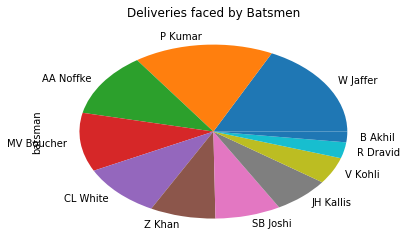

In [107]:
ipl_df[ipl_df['innings']==2]['batsman'].value_counts().plot(kind='pie')
plt.title('Deliveries faced by Batsmen')
plt.show()

# Box plot of runs scored by RCB (Royal Challengers Bangalore)

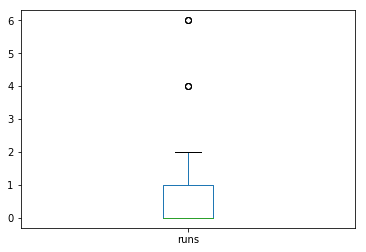

In [114]:
ipl_df[ipl_df['innings']==2]['runs'].plot(kind='box')
plt.show()